# Step 1 :- Import data & Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
customer_data = pd.read_csv(r'C:\Users\SNEHA\Desktop\Machine learning\Clustering\Hierarchical clustering\shoppingdata.csv')

In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Step 2 :-  Take specific Variable for Analysis

In [5]:
data = customer_data.iloc[:, 3:5].values
data[0:2]

array([[15, 39],
       [15, 81]], dtype=int64)

In [6]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Step 3 :-  Dendogram 

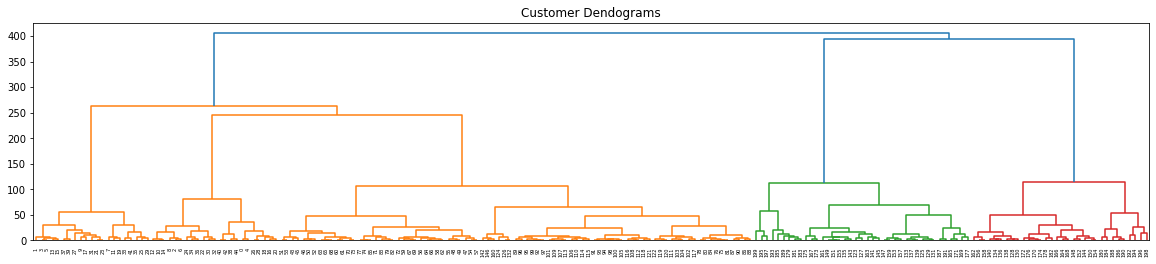

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 4))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward',metric='euclidean')) #ward = minimum of variance

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward') # ward = minimum

In [9]:
customer_data['Group']=cluster.fit_predict(data)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


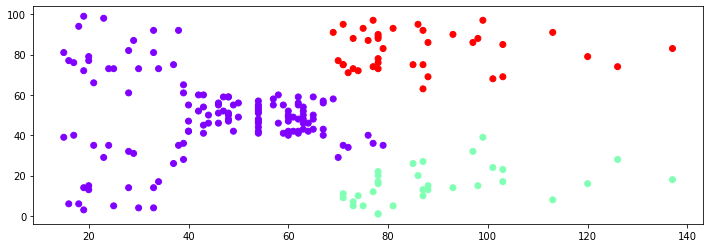

In [10]:
plt.figure(figsize=(12, 4))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

C:\Users\SNEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

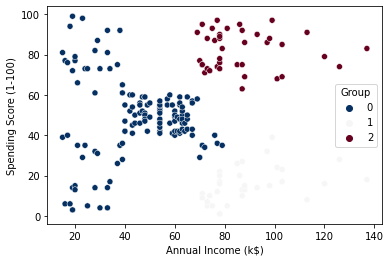

In [21]:
import seaborn as sns

sns.scatterplot(customer_data['Annual Income (k$)'],customer_data['Spending Score (1-100)'],
                hue='Group',palette='RdBu_r',data=customer_data)

In [11]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [12]:
customer_data.Group.value_counts(ascending=False)

0    129
2     39
1     32
Name: Group, dtype: int64

# Export Output file 

In [14]:
import os
os.chdir(r"C:\Users\SNEHA\Desktop\Machine learning\Clustering\Hierarchical clustering")

In [15]:
customer_data.to_csv("Shopping_data_output.csv",index=False)